In [16]:
import inspect

import numpy as np

# import libpysat
import plio
# 
from libpysat.examples import get_path
from plio.io.io_moon_minerology_mapper import M3

from libpysat.derived.m3 import pipe_funcs as pf
from libpysat.derived import m3, crism
# from libpysat import derived
from libpysat.derived.utils import generic_func

import matplotlib.pyplot as plt

In [19]:
def f(self):
    print(self)

In [29]:
def add_m3(package, cls):

    for module in dir(package):
        if module[0: 2] != "__" and "funcs" not in module:
            new_module = getattr(__import__(package.__name__, fromlist=[module]), module)
            
            module_funcs = inspect.getmembers(new_module)
            for func in module_funcs:
                if callable(func[1]) and not func[0].endswith('__'):
                    
                    function_name, function = func
                    
                    def wrapper(self, function, **kwargs):
                        return 
#                     cls.function_name = wrapper
#                     print(dir(cls))
                    setattr(cls, function_name, function(self, **kwargs))
                    
                    print(func)
                    print(getattr(cls, func[0]))
                

        
add_m3(m3, M3)

def sugar(func):
    
    def wrapper(self, **kwargs):
        return func(self, **kwargs)
        
    return wrapper

NameError: name 'self' is not defined

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_read', '_reindex', 'base_name', 'bd1900', 'bd1umratio', 'bd2300', 'bd2umratio', 'bd620', 'bdi1000', 'bdi2000', 'bdi_generic', 'calc_bdi_band', 'central_meridian', 'compute_overlap', 'coordinate_transformation', 'curvature', 'dataset', 'fe_est', 'fe_mare_est', 'file_name', 'footprint', 'forward_affine', 'func', 'function_name', 'generic_func', 'geospatial_coordinate_system', 'geotransform', 'h2o1', 'h2o2', 'h2o3', 'h2o4', 'h2o5', 'ice', 'iloc', 'inverse_affine', 'inverse_coordinate_transformation', 'iralbedo', 'latlon_corners', 'latlon_extent', 'latlon_to_pixel', 'loc', 'luceyc_amat', 'luceyc_omat', 'mafic_abs', 'mare_omat', 'metad

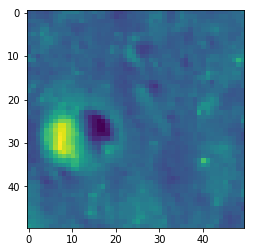

In [23]:
m3_geodata = M3(get_path("M3_4030seg_L2_aristcrater.tif"))
print(dir(m3_geodata))

raster = m3_geodata.read_array(1)
plt.imshow(raster)

In [14]:
def bd1900(data, **kwargs):
    """
    Parameters
    ----------
    data : ndarray
           (n,m,p) array

    wv_array : ndarray
               (n,1) array of wavelengths that correspond to the p
               dimension of the data array

    Returns
    -------
     : ndarray
       the processed ndarray
    """
    wavelengths = [1408, 1898, 2498]
    return generic_func(data, wavelengths, func = pf.bd1900_func, **kwargs)

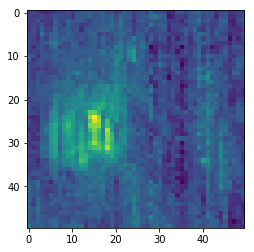

In [28]:
prod = m3_geodata.bd1900(m3.pipe.bd1900)
plt.imshow(prod)